In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, concat, read_csv, set_option
from sklearn.manifold import TSNE

set_option("display.max_columns", None)

In [ ]:
X_train = read_csv("../data/PAMAP2/x_train_data.csv")
X_test = read_csv("../data/PAMAP2/x_test_data.csv")
y_train = read_csv("../data/PAMAP2/y_train_data.csv")
y_test = read_csv("../data/PAMAP2/y_test_data.csv")

X_train["activity"] = y_train  # First 80% of the data
X_test["activity"] = y_test  # Last 20% of the data

imu_columns_hand = [f"IMU_hand_{i}" for i in range(1, 15)]
imu_columns_chest = [f"IMU_chest_{i}" for i in range(1, 15)]
imu_columns_ankle = [f"IMU_ankle_{i}" for i in range(1, 15)]

In [ ]:
def perform_tsne(data, body_part_name, perplexity=30) -> DataFrame:
    """
    Performs t-SNE on the given data and visualizes the results.

    Args:
        data (pd.DataFrame): The IMU data for the specified body part.
        body_part_name (str): The name of the body part (e.g., "hand", "chest", "ankle").
        perplexity (int): The perplexity parameter for t-SNE.
    """
    tsne = TSNE(n_components=1, random_state=42, max_iter=300, perplexity=perplexity)
    return DataFrame(
        {
            f"tsne_{body_part_name}": tsne.fit_transform(data)[:, 0],
            "timestamp": data["timestamp"],
            "activity": data["activity"],
        }
    )

In [14]:
data = concat([X_train, X_test])
tsne_hand = perform_tsne(data[["timestamp", "activity"] + imu_columns_hand], "hand")
tsne_chest = perform_tsne(data[["timestamp", "activity"] + imu_columns_chest], "chest")
tsne_ankle = perform_tsne(data[["timestamp", "activity"] + imu_columns_ankle], "ankle")

combined_df = tsne_hand.merge(
    tsne_chest.merge(tsne_ankle, "left", on=["timestamp", "activity"]),
    "left",
    on=["timestamp", "activity"],
)
combined_df.to_csv("../data/PAMAP2/dim_redu_data.csv", index=False)

In [2]:
combined_df = read_csv("../data/PAMAP2/dim_redu_data.csv")
tsne_hand = combined_df[["tsne_hand", "timestamp", "activity"]]
tsne_chest = combined_df[["tsne_chest", "timestamp", "activity"]]
tsne_ankle = combined_df[["tsne_ankle", "timestamp", "activity"]]

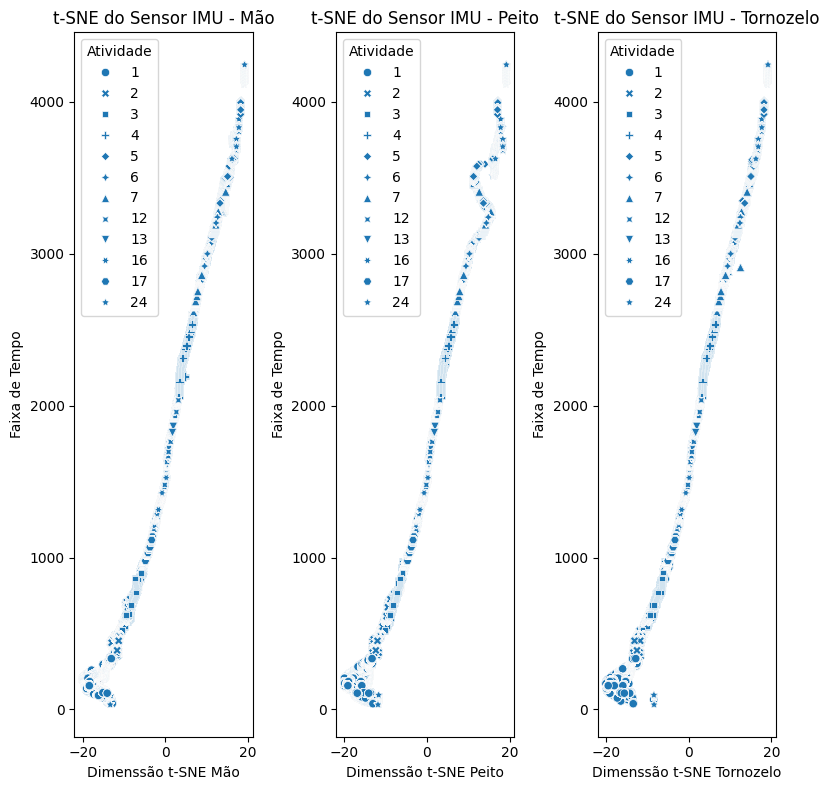

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(8, 8))

sns.scatterplot(
    x="tsne_hand",
    y="timestamp",
    # hue="activity",
    style="activity",
    # palette="viridis",
    data=tsne_hand,
    ax=axes[0],
)
axes[0].set_title("t-SNE do Sensor IMU - Mão")
axes[0].set_xlabel("Dimenssão t-SNE Mão")
axes[0].set_ylabel("Faixa de Tempo")
axes[0].legend(title="Atividade")

sns.scatterplot(
    x="tsne_chest",
    y="timestamp",
    # hue="activity",
    style="activity",
    # palette="viridis",
    data=tsne_chest,
    ax=axes[1],
)
axes[1].set_title("t-SNE do Sensor IMU - Peito")
axes[1].set_xlabel("Dimenssão t-SNE Peito")
axes[1].set_ylabel("Faixa de Tempo")
axes[1].legend(title="Atividade")

sns.scatterplot(
    x="tsne_ankle",
    y="timestamp",
    # hue="activity",
    style="activity",
    # palette="viridis",
    data=tsne_ankle,
    ax=axes[2],
)
axes[2].set_title("t-SNE do Sensor IMU - Tornozelo")
axes[2].set_xlabel("Dimenssão t-SNE Tornozelo")
axes[2].set_ylabel("Faixa de Tempo")
axes[2].legend(title="Atividade")

plt.tight_layout()
plt.show()

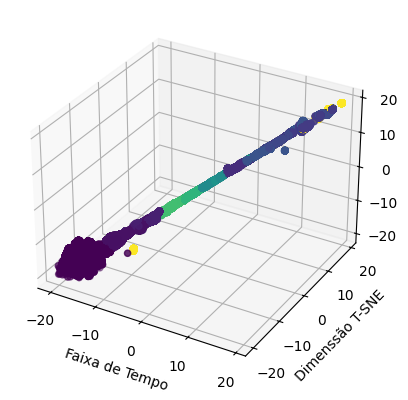

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(
    combined_df["tsne_ankle"],
    combined_df["tsne_chest"],
    combined_df["tsne_hand"],
    c=combined_df["activity"],
)
ax.set_xlabel("Faixa de Tempo")
ax.set_ylabel("Dimenssão T-SNE")
plt.show()

C:\Users\VDUART10\AppData\Local\Temp\ipykernel_15260\3580456319.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


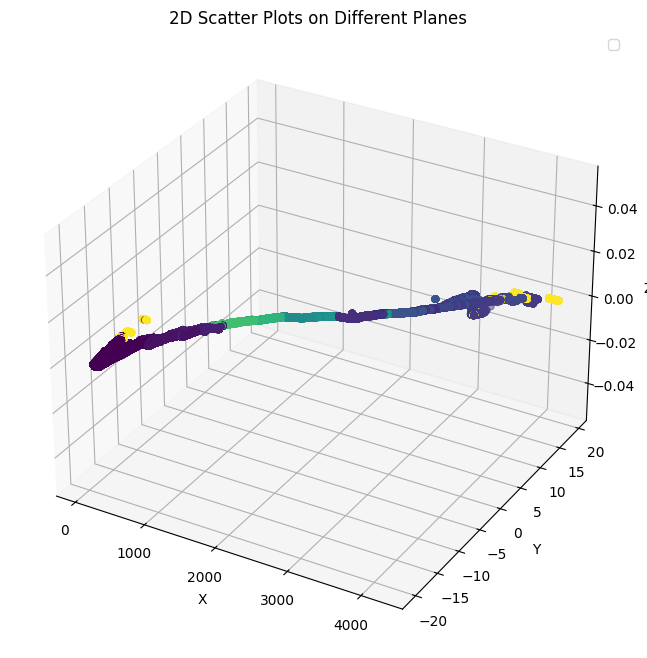

In [28]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    combined_df["timestamp"],
    combined_df["tsne_hand"],
    zs=0,
    c=combined_df["activity"],
    cmap="viridis",
    alpha=0.5,
)
ax.scatter(
    combined_df["timestamp"],
    combined_df["tsne_chest"],
    zs=0,
    c=combined_df["activity"],
    cmap="viridis",
    alpha=0.5,
)
ax.scatter(
    combined_df["timestamp"],
    combined_df["tsne_ankle"],
    zs=0,
    c=combined_df["activity"],
    cmap="viridis",
    alpha=0.5,
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("2D Scatter Plots on Different Planes")
ax.legend()

plt.show()

In [ ]:
combined_df = tsne_hand.merge(
    tsne_chest.merge(tsne_ankle, "left", on=["timestamp", "activity"]),
    "left",
    on=["timestamp", "activity"],
)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    combined_df["tsne_hand"],
    combined_df["tsne_chest"],
    combined_df["tsne_ankle"],
    c=combined_df["activity"],
    cmap="viridis",
    marker="*",
    s=20,
)
# ax.set_proj_type('persp', focal_length=0.2)  # FOV = 157.4 deg
ax.set_xlabel("t-SNE Hand")
ax.set_ylabel("t-SNE Chest")
ax.set_zlabel("t-SNE Ankle")
ax.set_title("3D t-SNE Visualization")
ax.set_adjustable("datalim")
plt.show()

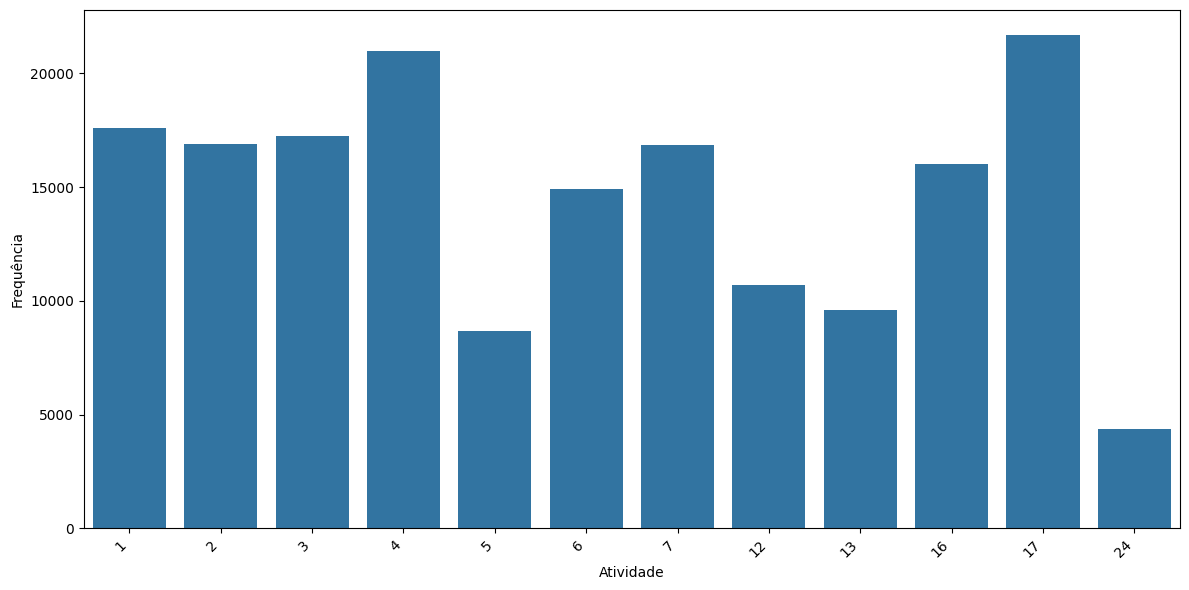

In [15]:
df = concat([X_train, X_test], axis=0)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="activity")
plt.xlabel("Atividade")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()